In [292]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Simple Regression
Simple linear regression is a statistical method that allows us to summarize and study relationships between two continuous (quantitative) variables:
* One variable, denoted x, is regarded as the predictor, explanatory, or independent variable.
* The other variable, denoted y, is regarded as the response, outcome, or dependent variable.

simple linear regression task as it involves just two variables.

# Multple Regression
* Almost all real world problems that you are going to encounter will have more than two variables. 
* Linear regression involving multiple variables is called "multiple linear regression". 
* The steps to perform multiple linear regression are almost similar to that of simple linear regression. 
* The difference lies in the evaluation. We can use it to find out which factor has the highest impact on the predicted output and how different variables relate to each other.
*  **Our focus is only on Multiple Regression**

# Dataset

In [293]:
dataset = pd.read_csv('petrol_consumption.csv')

# Split the data as training and testing with 80% and 20% respectively. dataset.head()

In [294]:
dataset.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


# Split the data from Target Variable

In [295]:
X = dataset[['Petrol_tax', 'Average_income', 'Paved_Highways',
       'Population_Driver_licence(%)']]
y = dataset['Petrol_Consumption']

# Split the data as training and testing with 80% and 20% respectively.

In [296]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Training the Model

Finally, to train the algorithm we execute the same code as before, using the fit() method of the LinearRegression class:

In [297]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

# Slope
And finally, to train the algorithm we execute the same code as before, using the fit() method of the LinearRegression class:

In [298]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Slope'])
coeff_df

,Slope
Petrol_tax,-40.016660
Average_income,-0.065413
Paved_Highways,-0.004741
Population_Driver_licence(%),1341.862121


# Y- Intercept

In [299]:
y_intercept = regressor.intercept_
y_intercept

425.59933220324206

# Making Preditions

In [300]:
y_pred = regressor.predict(X_test)

In [301]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})


In [302]:
df

,Actual,Predicted
29,534,469.391989
4,410,545.645464
26,577,589.668394
30,571,569.730413
32,577,649.774809
37,704,646.631164
34,487,511.608148
40,587,672.475177
7,467,502.074782
10,580,501.270734


# Data Visualization on Ground Truth and Prediction Values

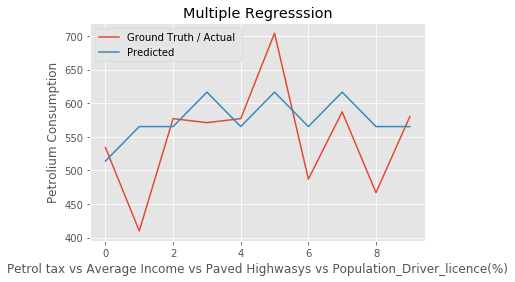

In [322]:
import numpy as np
from matplotlib.pylab import plt #load plot library
# indicate the output of plotting function is printed to the notebook
%matplotlib inline 
x1 = df.Actual
y1 = df.Predicted
Actual=list(x1)
Predicted =list(y1)
plt.plot(Actual, label = 'Ground Truth / Actual ')
plt.plot(Predicted, label = 'Predicted')
plt.xlabel('Petrol tax vs Average Income vs Paved Highwasys vs Population_Driver_licence(%)')
plt.ylabel('Petrolium Consumption')
plt.title('Multiple Regresssion')
plt.legend()
plt.show()

# Metrics for Evaluating the Algorithm
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For regression algorithms, four evaluation metrics are commonly used:
* **Mean Absolute Error (MAE)** is the mean of the absolute value of the errors. It is calculated as:   
<img src="MAE.png" width="180">

* **Mean Squared Error (MSE)** is the mean of the squared errors and is calculated as:
<img src="MSE.png"  width ="180" />

* **Root Mean Squared Error (RMSE)** is the square root of the mean of the squared errors:
<img src="RMSE.png"  width ="180" />

* **sum of  Squared Error (SSE)** is the square root of the mean of the squared errors:
<img src="SSE.png"  width ="180" />

In [318]:
def sse(y_test, y_pred):
        '''returns sum of squared errors (model vs actual)'''
        squared_errors = (y_test - y_pred) ** 2
        return np.sum(squared_errors)

In [305]:
from sklearn import metrics
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error(RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Sum of  Squared Error(SSE):', sse(y_test,y_pred))

Mean Absolute Error (MAE): 56.8222474789647
Mean Squared Error (MSE): 4666.344787588362
Root Mean Squared Error(RMSE): 68.31064915215168
Sum of  Squared Error(SSE): 46663.44787588362


# Linear regression based on Petrolium_tax and Petrolium_Consumption

(48, 1) (48,)
[-51.24658626] 975.1739405976821
(10,)
(200,)


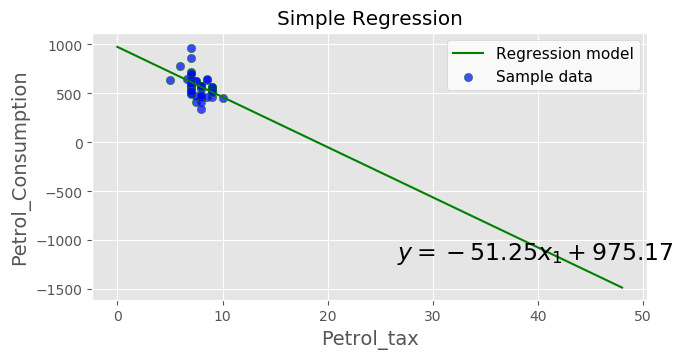

In [306]:
features = ['Petrol_tax']
target = 'Petrol_Consumption'

X = dataset[features].values.reshape(-1, len(features))
y = dataset[target].values

print(X.shape, y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)



from sklearn import linear_model

ols1 = linear_model.LinearRegression()
ols1 = ols1.fit(X_train, y_train)
print(ols1.coef_,ols1.intercept_)


x_pred = np.linspace(0, 48, 200)            # 200 data points between 0 ~ 40
x_pred = x_pred.reshape(-1, len(features))  # preprocessing required by scikit-learn functions

y_pred = ols1.predict(x_pred)

print(y_test.shape)
print(y_pred.shape)

# from sklearn import metrics
# print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
# print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
# print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

import matplotlib.pyplot as plt

plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(7, 3.5))

ax.plot(x_pred, y_pred, color='g', label='Regression model')
ax.scatter(X, y, edgecolor='g', facecolor='blue', alpha=0.7, label='Sample data')
ax.set_ylabel('Petrol_Consumption', fontsize=14)
ax.set_xlabel('Petrol_tax', fontsize=14)
ax.legend(facecolor='white', fontsize=11)
ax.text(0.55, 0.15, '$y = %.2f x_1 + %.2f $' % (ols1.coef_[0], abs(ols1.intercept_)), fontsize=17, transform=ax.transAxes)
fig.tight_layout()
plt.title("Simple Regression")
plt.show()

# Y- Intercept

In [307]:
y_intercept = ols1.intercept_

In [308]:
y_intercept

975.1739405976821

# Slope

In [309]:
Slope = ols1.coef_

In [310]:
Slope

array([-51.24658626])

# Making Predictions

In [311]:
y_pred = ols1.predict(X_test)

In [312]:
y_pred.shape

(10,)

In [313]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [314]:
df

,Actual,Predicted
0,534,513.954664
1,410,565.201251
2,577,565.201251
3,571,616.447837
4,577,565.201251
5,704,616.447837
6,487,565.201251
7,587,616.447837
8,467,565.201251
9,580,565.201251


# Data Visualization on Ground Truth and Prediction Values

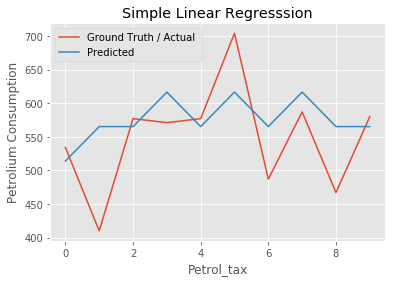

In [321]:
import numpy as np
from matplotlib.pylab import plt #load plot library
# indicate the output of plotting function is printed to the notebook
%matplotlib inline 
x1 = df.Actual
y1 = df.Predicted
Actual=list(x1)
Predicted =list(y1)
plt.plot(Actual, label = 'Ground Truth / Actual ')
plt.plot(Predicted, label = 'Predicted')
plt.xlabel('Petrol_tax')
plt.ylabel('Petrolium Consumption')
plt.title('Simple Linear Regresssion')
plt.legend()
plt.show()

In [316]:
y_pred = ols1.predict(X_test)

# Metrics for Evaluating the Algorithm

In [317]:
from sklearn import metrics
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error(RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Sum of  Squared Error(SSE):', sse(y_test,y_pred))

Mean Absolute Error (MAE): 55.24931725228345
Mean Squared Error (MSE): 5134.365103565068
Root Mean Squared Error(RMSE): 71.65448418323216
Sum of  Squared Error(SSE): 51343.651035650684


# References
*  https://en.wikipedia.org/wiki/Simple_linear_regression 
*  https://en.wikipedia.org/wiki/Linear_regression 
*  https://en.wikipedia.org/wiki/Regression_analysis 
*  https://machinelearningmastery.com/implement-simple-linear-regression-scratch-python/ 
*  https://www.datavedas.com/model-evaluation-regression-models/